In [20]:
import pandas as pd;import numpy as np;import matplotlib.pyplot as plt;import seaborn as sns;sns.set()

taxis=pd.read_csv(r'C:\Users\SONY\Desktop\NumPy\nyc_taxi_trip_duration.csv')


In [22]:
taxis['pickup_datetime']=pd.to_datetime(taxis.pickup_datetime)
taxis.dropoff_datetime=pd.to_datetime(taxis.dropoff_datetime)

In [25]:
taxis.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [27]:
import datetime
nombres_dias=['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']

taxis['Nombre_dia']=taxis.pickup_datetime.apply(lambda x: nombres_dias[datetime.date.weekday(x)])
taxis['Numero_dia']=taxis.pickup_datetime.apply(lambda x: datetime.date.weekday(x))
taxis['Hora_viaje']=taxis.pickup_datetime.apply(lambda x: x.hour)


In [37]:
def intervalo_dia(x):
    if x>=6 and x<12:
        return 'Mañana'
    elif x>=12 and x<=17:
        return 'Tarde'
    elif x>=18 and x<24:
        return 'Noche'
    elif x>=0 and x<6:
        return 'Madrugada'

taxis['Intervalo']=taxis.Hora_viaje.apply(intervalo_dia)

        
    
    

Text(0, 0.5, 'Cuenta')

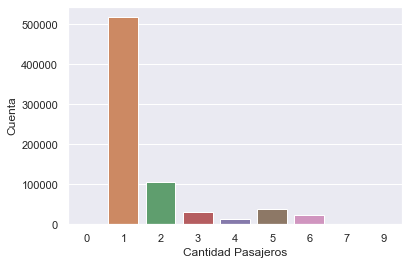

In [38]:
sns.countplot(taxis.passenger_count)
plt.xlabel('Cantidad Pasajeros')
plt.ylabel('Cuenta')

##### De la gráfica anterior se observa que la mayoría de los viajes se hace sólo con un pasajero


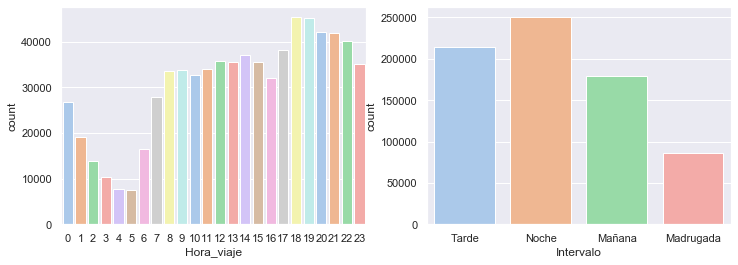

In [39]:
fig,ax=plt.subplots(1,2,figsize=(12,4))

sns.countplot(taxis.Hora_viaje,ax=ax[0],palette='pastel')
sns.countplot(taxis.Intervalo,ax=ax[1],palette='pastel')

##### Del par de gráficas anteriores se puede concluir que la mayoría de los viajes se realizan en la horas de la noche, mientras que el número de viajes desciende en las horas de la madrugada

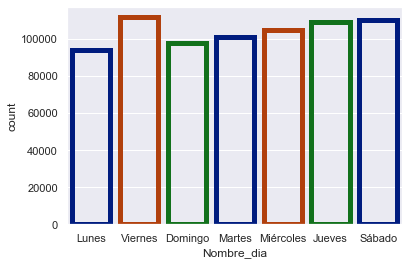

In [40]:
sns.countplot(taxis.Nombre_dia,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))

##### El día con mayor número de viajes en taxi es el viernes, seguido por el sábado y el jueves respectivamente.
